In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import seaborn as sns

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import sys
import os

cdir = os.getcwd() #get current directory
os.chdir(cdir) #make sure you are in the current directory

#mother directory (i.e. one folder 'above')
mother_dir = os.path.abspath(os.path.join(cdir, os.pardir))
#verify  mother directory
print(f"Mother directory {mother_dir} given")

#get the path to the py directory
py_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
#add the py directory to the system path
if py_dir not in sys.path:
    sys.path.append(py_dir)

#verify the directory has been added
print(f"Added {py_dir} to sys.path")
print(f"System path: {sys.path}")

Mother directory /Users/ronja/Documents/GitHub/adaptive Wilson-Cowan continuum - numpy given
Added /Users/ronja/Documents/GitHub/adaptive Wilson-Cowan continuum - numpy/py to sys.path
System path: ['/Users/ronja/Documents/GitHub/adaptive Wilson-Cowan continuum - numpy/notebooks', '/Users/ronja/opt/anaconda3/lib/python39.zip', '/Users/ronja/opt/anaconda3/lib/python3.9', '/Users/ronja/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/ronja/Documents/GitHub/adaptive Wilson-Cowan continuum - numpy/py']


In [3]:
#Import necesarry functions from python-scripts of py-folder

#package to individually set parameters
from params import setParams

In [4]:
from integration import run

In [6]:

#from integration import run

#function to compute fixed points of new system & check their stability of w(x)=dirac measure
#these functions are not necessary anymore if you use py.funcs.run_fixedpoints and run_violation
from analysis import computeFPs, checkFixPtsStability 

#function that combines the test for static, dynamic & double type of instability
#from turings import checkStability

#functions that make up the 3d polynomial
from turings import c0, c1, c2

#functions that help visualisations of analyses (nullclines, transfer functions, determinant, trace)
from analysis import activity_ui, activity_ue, F_a

# #  - - functions for the exploration of the adaptation and its' parameters - - # #
# # - - used for the average rate and the phase latency - - # #

#in py.funcs are two functions that average over finite differences
#py.funcs.rateBatches1d and py.funcs.rateBatchesNd 
#We only need to call the latter, it uses the first
from funcs import getAvgPSD
#to be able to compute H[ue], we need ue.
#we summarised the simulation as well as the identification of fps & their stability in the following
from runFuncs import run_fixedpoints, run_violation
from runFuncs import run_latencies, run_velocity
#compute the hilbert trafo and the instantaneous phase
from funcs import hilbert_trafo_nd, inst_phase
#to identify, how many timesteps the imag(H[ue]) crosses the zero
from funcs import getSwitchIndex, getEquidistancy, getKuramotoOrder
#to count the amount of nodes necessary until one cycle of oscillation is finished
from funcs import count_nodes_for_descent,  rotation_in_latency

In [7]:
ee, ii = -0.42, -0.68
params={'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 20*1000, 'beta_a': 5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee1, ii1 = 0.1, -0.85
params_adaps = {'I_e': ee1, 'I_i': ii1, 'b': 0.2, 'end_t': 20*1000, 'beta_a': 5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee2, ii2 = -0.3, -0.55
params_h = {'I_e': ee2, 'I_i': ii2, 'b': 0.2, 'end_t': 20*1000, 'beta_a': 5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [8]:
#compute fp-values of uncoupled system.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

#compute fp-values of uncoupled system.
fps_adaps, stab_adaps = run_fixedpoints(params_adaps)
vio_adaps = run_violation(params_adaps, fps_adaps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_adaps), str(stab_adaps)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_adaps[0]), str(vio_adaps)))

#compute fp-values of uncoupled system.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_h[0]), str(vio_h)))

without mechanism: fixed points [[0.12247103 0.12530677]], stability [1] (1=stable, 0=unstable)
the down-fp [0.12247103 0.12530677] undergoes the violations ((1, 0.53), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.4104407  0.53201132]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.4104407  0.53201132] undergoes the violations ((1, 0.508), (1, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.11595528 0.16861238]], we have the corresponding stability [1] (1=stable, 0=unstable)
the down-fp [0.11595528 0.16861238] undergoes the violations ((1, 0.622), (0, 0), (0, 0)) (0=no vio, 1=turing)


/Users/ronja/Documents/GitHub/adaptive Wilson-Cowan continuum - numpy/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


In [10]:
#without mechanism
ue, ui, adaps = run(params, fp=fps[0], wavenumber=vio[0][1], itype='rungekutta')

In [11]:
#without mechanism
ue_adaps, ui_adaps, adaps = run(params_adaps, fp=fps_adaps[0], wavenumber=vio_adaps[0][1] ,itype='rungekutta')

In [12]:
#without mechanism
ue_h, ui_h, adaps = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1], itype='rungekutta')

In [13]:
k, kt = getKuramotoOrder(ue[-int(8*1000*(1/0.5)):,:], axis=1)
ka, kta = getKuramotoOrder(ue_adaps[-int(8*1000*(1/0.5)):,:])
kh, kth = getKuramotoOrder(ue_h[-int(8*1000*(1/0.5)):,:])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_26880/2849455875.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)


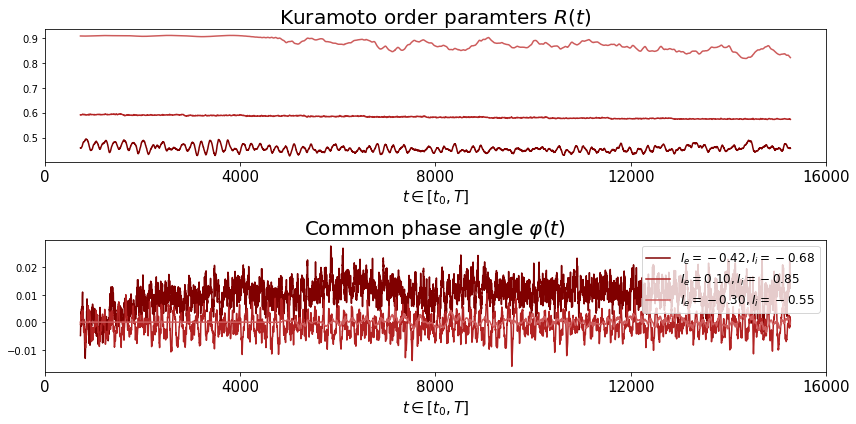

In [14]:
tfs = 20
fs = 15

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,6))

ax0.plot(k, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax0.plot(ka, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax0.plot(kh, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

ax1.plot(kt, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax1.plot(kta, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax1.plot(kth, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

titles = [r'Kuramoto order paramters $R(t)$',
          r'Common phase angle $\varphi(t)$']


for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel(r'$t\in[t_0, T]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)

ax1.legend(loc='upper right', fontsize=fs-3)
plt.tight_layout()

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

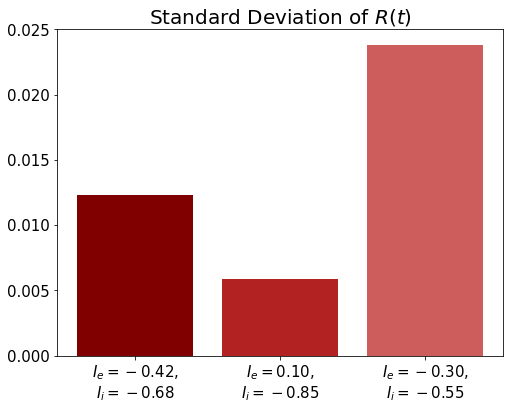

In [15]:
kstd, kastd, khstd = np.std(k, ddof=1),np.std(ka, ddof=1),np.std(kh, ddof=1)
plt.figure(figsize=(8,6)) 
plt.bar([r'$I_e=%.2f$,'%ee + '\n' + r'$I_i=%.2f$' %ii, 
         r'$I_e=%.2f$,'%ee1 + '\n' + r'$I_i=%.2f$' %ii1, 
         r'$I_e=%.2f$,'%ee2 + '\n' + r'$I_i=%.2f$' %ii2], [kstd, kastd, khstd], color=['maroon', 'firebrick', 'indianred'])
plt.title(r'Standard Deviation of $R(t)$', fontsize=tfs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_26880/3388941464.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_26880/3388941464.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


Text(0, 0.5, 'x $[ \\mu m]$')

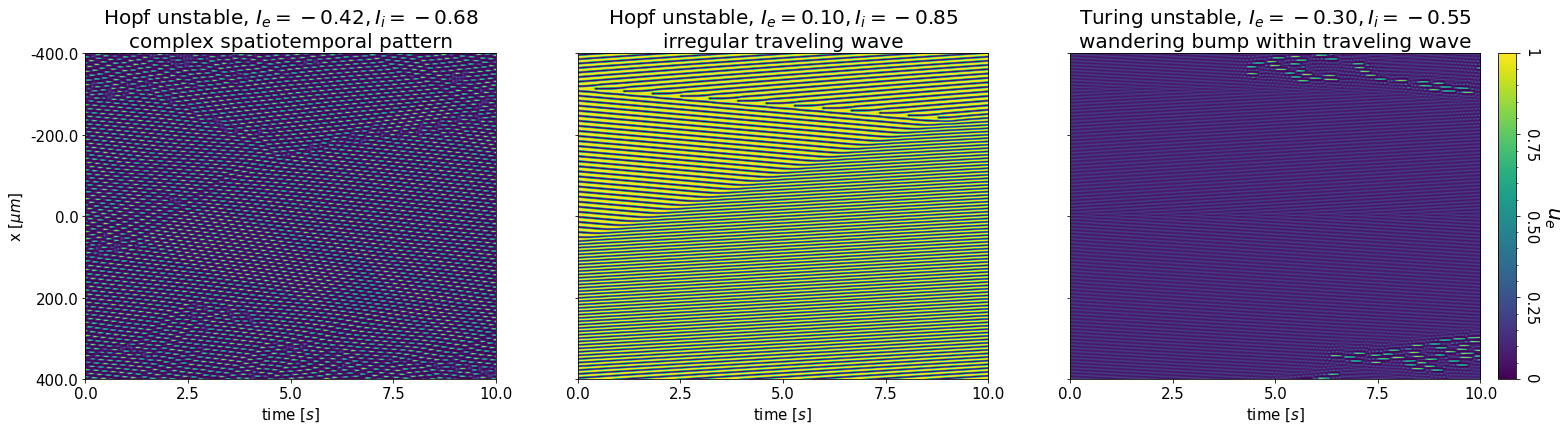

In [16]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 10
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

#titles = ['Turing unstable down' + '\n' + 'without mechanism', 
#          'Turing unstable down' + '\n' + 'with adaptation',
#          'Turing unstable down' + '\n' + 'with h-current']

titles = [r'Hopf unstable, $I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'complex spatiotemporal pattern', 
          r'Hopf unstable, $I_e=%.2f, I_i=%.2f$' %(ee1,ii1) + '\n' + 'irregular traveling wave',
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(ee2,ii2) + '\n' + 'wandering bump within traveling wave']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')


cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([.91,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)

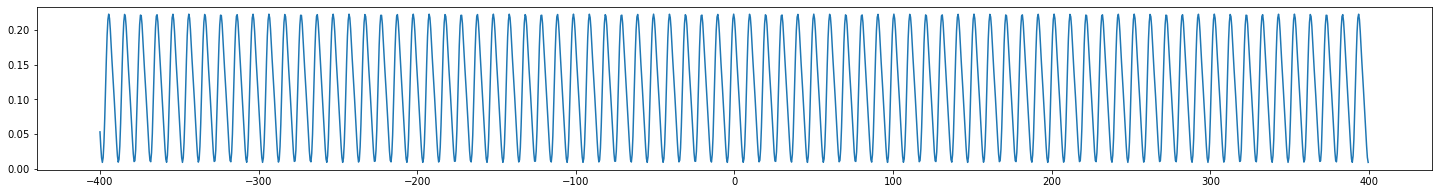

In [17]:
plt.figure(figsize=(25,3))
plt.plot(np.roll(np.fft.fftshift(params['x']), -1), ue_h[0])

In [165]:
ee, ii = 0.1, -0.85
params={'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 60*1000, 'beta_a': 5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.1}

params_adaps = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 60*1000, 'beta_a': 5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

params_h = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 60*1000, 'beta_a': 5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [166]:
#compute fp-values of uncoupled system.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

#compute fp-values of uncoupled system.
fps_adaps, stab_adaps = run_fixedpoints(params_adaps)
vio_adaps = run_violation(params_adaps, fps_adaps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_adaps), str(stab_adaps)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_adaps[0]), str(vio_adaps)))

#compute fp-values of uncoupled system.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_h[0]), str(vio_h)))

without mechanism: fixed points [[0.4104407  0.53201132]], stability [0] (1=stable, 0=unstable)
the down-fp [0.4104407  0.53201132] undergoes the violations ((1, 0.508), (1, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.4104407  0.53201132]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.4104407  0.53201132] undergoes the violations ((1, 0.508), (1, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.4104407  0.53201132]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.4104407  0.53201132] undergoes the violations ((1, 0.508), (1, 0), (0, 0)) (0=no vio, 1=turing)


In [167]:
#without mechanism
ue, ui = run(params, fp=fps[0], wavenumber=vio[0][1] ,itype='rungekutta')

In [168]:
#without mechanism
ue_adaps, ui_adaps = run(params_adaps, fp=fps_adaps[0], wavenumber=vio_adaps[0][1] ,itype='rungekutta')

In [169]:
#without mechanism
ue_h, ui_h = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1], itype='rungekutta')

In [170]:
k, kt = getKuramotoOrder(ue[-int(8*1000*(1/0.5)):,:], axis=1)
ka, kta = getKuramotoOrder(ue_adaps[-int(8*1000*(1/0.5)):,:])
kh, kth = getKuramotoOrder(ue_h[-int(8*1000*(1/0.5)):,:])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/2849455875.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)


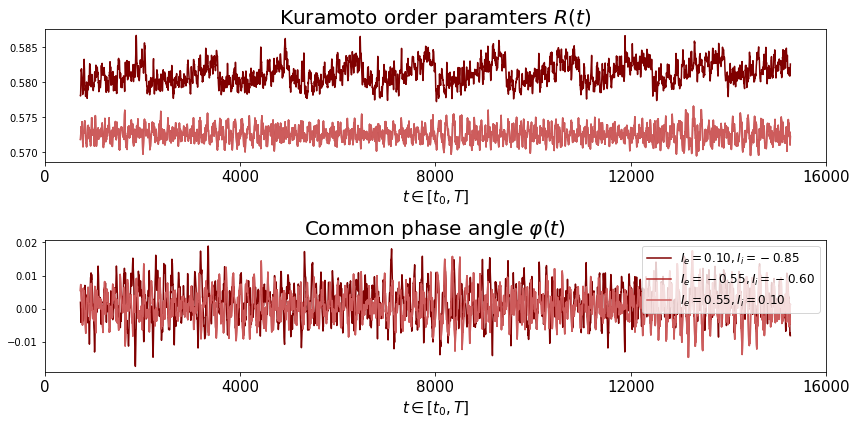

In [171]:
tfs = 20
fs = 15

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,6))

ax0.plot(k, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax0.plot(ka, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax0.plot(kh, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

ax1.plot(kt, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax1.plot(kta, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax1.plot(kth, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

titles = [r'Kuramoto order paramters $R(t)$',
          r'Common phase angle $\varphi(t)$']


for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel(r'$t\in[t_0, T]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)

ax1.legend(loc='upper right', fontsize=fs-3)
plt.tight_layout()

(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
        0.0016, 0.0018]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

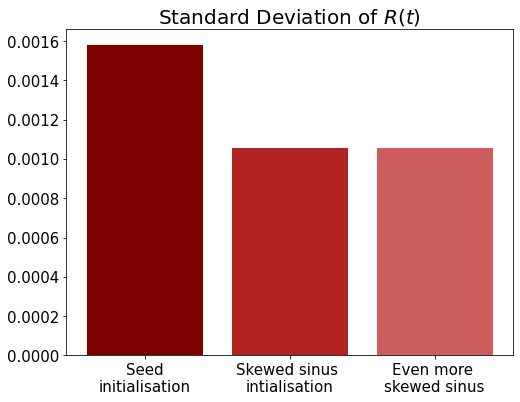

In [172]:
kstd, kastd, khstd = np.std(k, ddof=1),np.std(ka, ddof=1),np.std(kh, ddof=1)
plt.figure(figsize=(8,6)) 
plt.bar(['Seed' + '\n'+  'initialisation', 
          'Skewed sinus ' + '\n'+  'intialisation',
          'Even more ' + '\n'+  'skewed sinus'], [kstd, kastd, khstd], color=['maroon', 'firebrick', 'indianred'])
plt.title(r'Standard Deviation of $R(t)$', fontsize=tfs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1261344848.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1261344848.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


Text(0, 0.5, 'x $[ \\mu m]$')

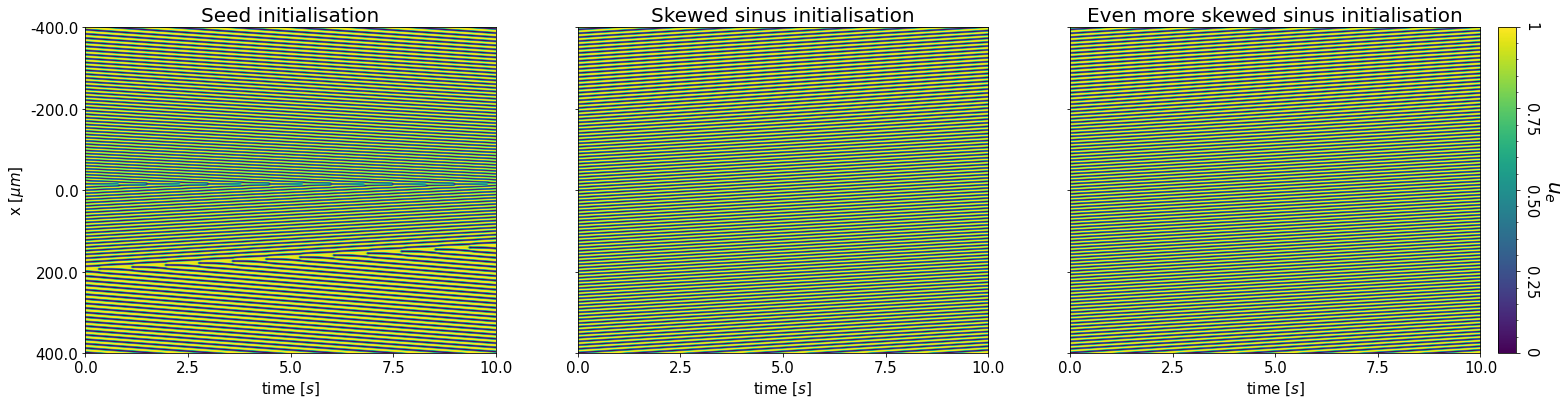

In [173]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 10
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

#titles = ['Turing unstable down' + '\n' + 'without mechanism', 
#          'Turing unstable down' + '\n' + 'with adaptation',
#          'Turing unstable down' + '\n' + 'with h-current']

titles = ['Seed initialisation', 
          'Skewed sinus initialisation',
          'Even more skewed sinus initialisation']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')


cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([.91,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)

In [247]:
ee, ii = 0.6, 0.2
params={'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 20*1000, 'beta_a': 5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

params_adaps = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 20*1000, 'beta_a': 5, 
        'length': 800, 'n': 4000,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

params_h = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 40*1000, 'beta_a': 5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [248]:
#compute fp-values of uncoupled system.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

#compute fp-values of uncoupled system.
fps_adaps, stab_adaps = run_fixedpoints(params_adaps)
vio_adaps = run_violation(params_adaps, fps_adaps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_adaps), str(stab_adaps)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_adaps[0]), str(vio_adaps)))

#compute fp-values of uncoupled system.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_h[0]), str(vio_h)))

without mechanism: fixed points [[0.07777613 0.50391833]
 [0.74489265 0.99984799]
 [0.99285985 0.99999746]], stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.07777613 0.50391833] undergoes the violations ((0, 0), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.07777613 0.50391833]
 [0.74489265 0.99984799]
 [0.99285985 0.99999746]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.07777613 0.50391833] undergoes the violations ((0, 0), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.07777613 0.50391833]
 [0.74489265 0.99984799]
 [0.99285985 0.99999746]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.07777613 0.50391833] undergoes the violations ((0, 0), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [249]:
#without mechanism
ue, ui = run(params, fp=fps[0], wavenumber=vio[0][1] ,itype='rungekutta')

ZeroDivisionError: float division by zero

In [207]:
#without mechanism
ue_adaps, ui_adaps = run(params_adaps, fp=fps_adaps[0], wavenumber=vio_adaps[0][1] ,itype='rungekutta')

In [237]:
#without mechanism
ue_h, ui_h = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1], itype='rungekutta')

In [238]:
k, kt = getKuramotoOrder(ue[-int(8*1000*(1/0.5)):,:], axis=1)
ka, kta = getKuramotoOrder(ue_adaps[-int(8*1000*(1/0.5)):,:])
kh, kth = getKuramotoOrder(ue_h[-int(8*1000*(1/0.5)):,:])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/2849455875.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)


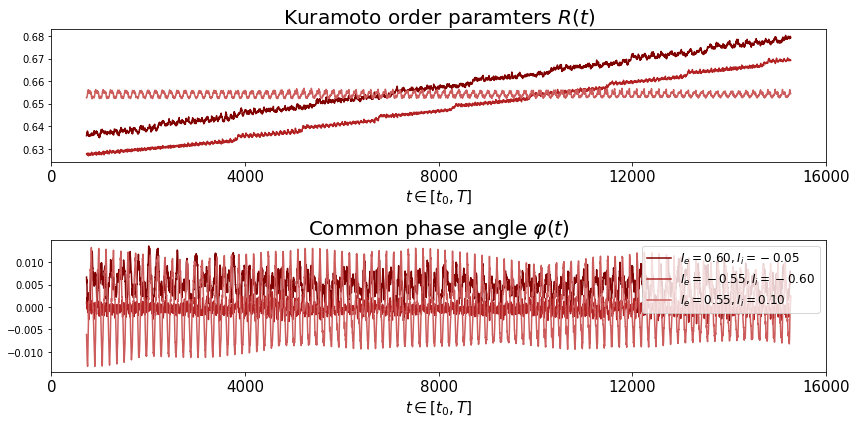

In [239]:
tfs = 20
fs = 15

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,6))

ax0.plot(k, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax0.plot(ka, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax0.plot(kh, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

ax1.plot(kt, c='maroon', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax1.plot(kta, c='firebrick', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax1.plot(kth, c='indianred', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

titles = [r'Kuramoto order paramters $R(t)$',
          r'Common phase angle $\varphi(t)$']


for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel(r'$t\in[t_0, T]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)

ax1.legend(loc='upper right', fontsize=fs-3)
plt.tight_layout()

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

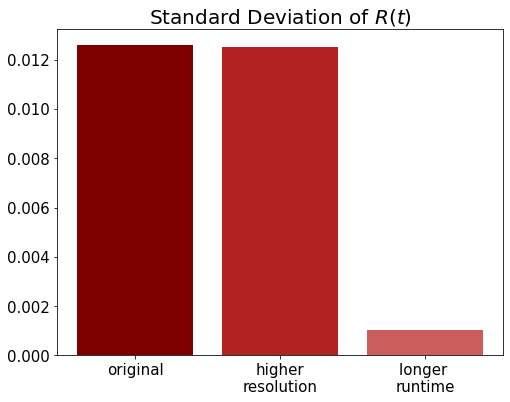

In [240]:
kstd, kastd, khstd = np.std(k, ddof=1),np.std(ka, ddof=1),np.std(kh, ddof=1)
plt.figure(figsize=(8,6)) 
plt.bar(['original', 
          'higher' + '\n'+  'resolution',
          'longer ' + '\n'+  'runtime'], [kstd, kastd, khstd], color=['maroon', 'firebrick', 'indianred'])
plt.title(r'Standard Deviation of $R(t)$', fontsize=tfs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1263323267.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1263323267.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


Text(0, 0.5, 'x $[ \\mu m]$')

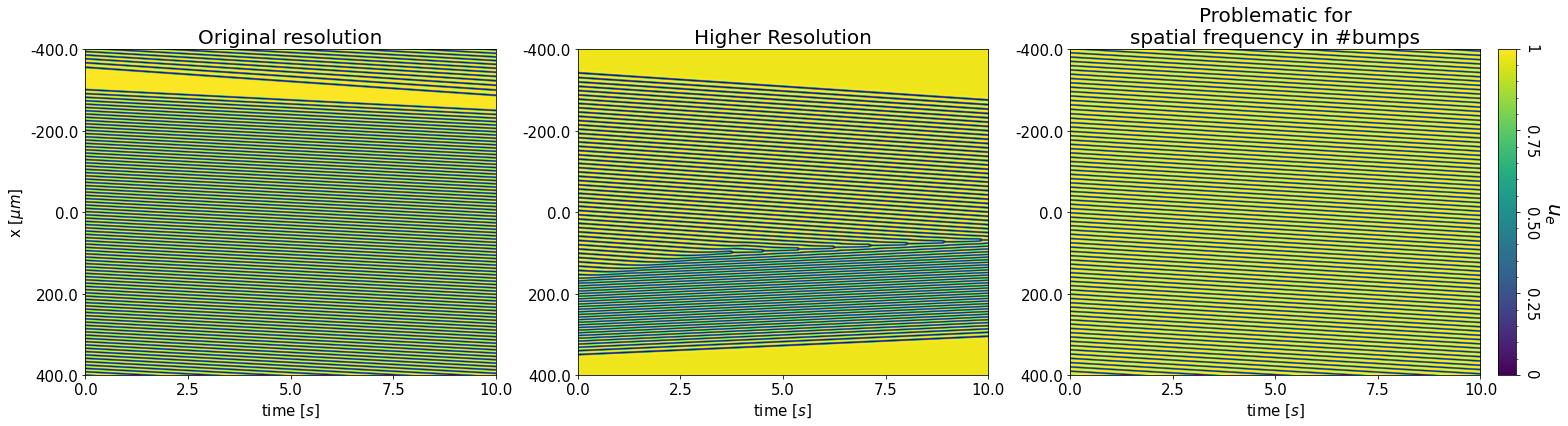

In [246]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6))

duration = 10
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

#titles = ['Turing unstable down' + '\n' + 'without mechanism', 
#          'Turing unstable down' + '\n' + 'with adaptation',
#          'Turing unstable down' + '\n' + 'with h-current']

titles = ['Original resolution', 
          'Higher Resolution',
          'Problematic for'+ '\n'+ 'spatial frequency in #bumps']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')


cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([.91,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)

In [235]:
fr, psd_fr = getAvgPSD(ue_h[:,-int(60*1000*2):], fs=2000, nperseg=1)
fr

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 2000 is greater than input length  = 1600, using nperseg = 1600
  warnings.warn('nperseg = {0:d} is greater than input length '


array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
        10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
        20.  ,  21.25,  22.5 ,  23.75,  25.  ,  26.25,  27.5 ,  28.75,
        30.  ,  31.25,  32.5 ,  33.75,  35.  ,  36.25,  37.5 ,  38.75,
        40.  ,  41.25,  42.5 ,  43.75,  45.  ,  46.25,  47.5 ,  48.75,
        50.  ,  51.25,  52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,
        60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,  68.75,
        70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,  78.75,
        80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,  87.5 ,  88.75,
        90.  ,  91.25,  92.5 ,  93.75,  95.  ,  96.25,  97.5 ,  98.75,
       100.  , 101.25, 102.5 , 103.75, 105.  , 106.25, 107.5 , 108.75,
       110.  , 111.25, 112.5 , 113.75, 115.  , 116.25, 117.5 , 118.75,
       120.  , 121.25, 122.5 , 123.75, 125.  , 126.25, 127.5 , 128.75,
       130.  , 131.25, 132.5 , 133.75, 135.  , 136.25, 137.5 , 138.75,
      

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)


76.0

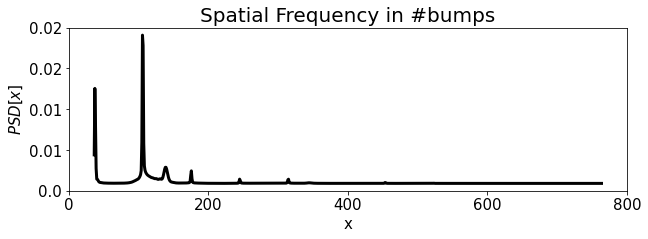

In [234]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(fr, psd_fr, c='k', lw=3)
ax.set_title('Spatial Frequency in #bumps', fontsize=tfs)

ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)

ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)

ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel(r'$PSD[x]$', fontsize=fs)
fr[np.argmax(psd_fr)]

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)


95.0

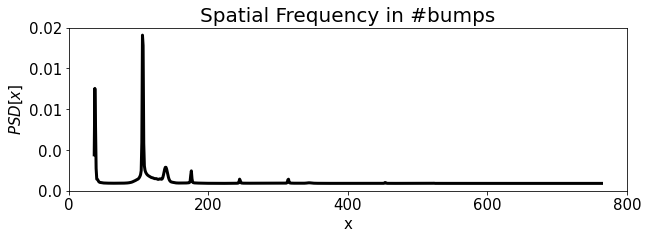

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(fr, psd_fr, c='k', lw=3)
ax.set_title('Spatial Frequency in #bumps', fontsize=tfs)

ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)

ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)

ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel(r'$PSD[x]$', fontsize=fs)
fr[np.argmax(psd_fr)]

In [63]:
ee, ii = -0.8, -0.9
params={'I_e': ee, 'I_i': ii, 'b': -0.2, 'end_t': 20*1000, 'beta_a': -5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee1, ii1 = -0.55, -0.6
params_adaps = {'I_e': ee1, 'I_i': ii1, 'b': -0.2, 'end_t': 20*1000, 'beta_a': -5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee2, ii2 = 0.55, 0.1
params_h = {'I_e': ee2, 'I_i': ii2, 'b': -0.2, 'end_t': 20*1000, 'beta_a': -5, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [64]:
#compute fp-values of uncoupled system.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

#compute fp-values of uncoupled system.
fps_adaps, stab_adaps = run_fixedpoints(params_adaps)
vio_adaps = run_violation(params_adaps, fps_adaps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_adaps), str(stab_adaps)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_adaps[0]), str(vio_adaps)))

#compute fp-values of uncoupled system.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_h[0]), str(vio_h)))

without mechanism: fixed points [[0.10803811 0.05008097]], stability [1] (1=stable, 0=unstable)
the down-fp [0.10803811 0.05008097] undergoes the violations ((1, 0.358), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.11768782 0.1501175 ]], we have the corresponding stability [1] (1=stable, 0=unstable)
the down-fp [0.11768782 0.1501175 ] undergoes the violations ((1, 0.61), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.15332281 0.59125766]
 [0.67201892 0.999169  ]
 [0.99681877 0.99999607]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.15332281 0.59125766] undergoes the violations ((1, 0.648), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [65]:
#without mechanism
ue, ui = run(params, fp=fps[0], wavenumber=vio[0][1] ,itype='rungekutta')

In [66]:
#with adaptation
ue_adaps, ui_adaps = run(params_adaps, fp=fps_adaps[0], wavenumber=vio_adaps[0][1],itype='rungekutta')

In [67]:
#with adaptation
ue_h, ui_h = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1],itype='rungekutta')

In [68]:
k, kt = getKuramotoOrder(ue[-int(8*1000*(1/0.5)):,:], axis=1)
ka, kta = getKuramotoOrder(ue_adaps[-int(8*1000*(1/0.5)):,:])
kh, kth = getKuramotoOrder(ue_h[-int(8*1000*(1/0.5)):,:])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/2858606640.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)


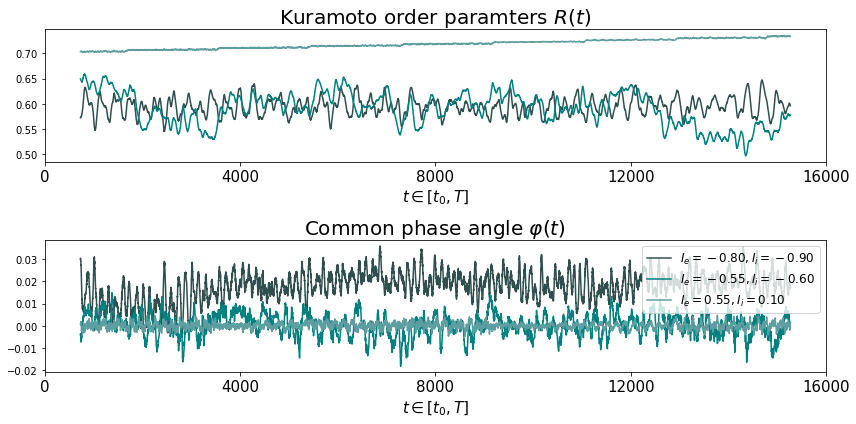

In [69]:
tfs = 20
fs = 15

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,6))

ax0.plot(k, c='darkslategray', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax0.plot(ka, c='teal', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax0.plot(kh, c='cadetblue', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

ax1.plot(kt, c='darkslategray', label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax1.plot(kta, c='teal', label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax1.plot(kth, c='cadetblue', label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

titles = [r'Kuramoto order paramters $R(t)$',
          r'Common phase angle $\varphi(t)$']


for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel(r'$t\in[t_0, T]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=np.linspace(0,len(k), 5).astype(int), fontsize=fs)

ax1.legend(loc='upper right', fontsize=fs-3)
plt.tight_layout()

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

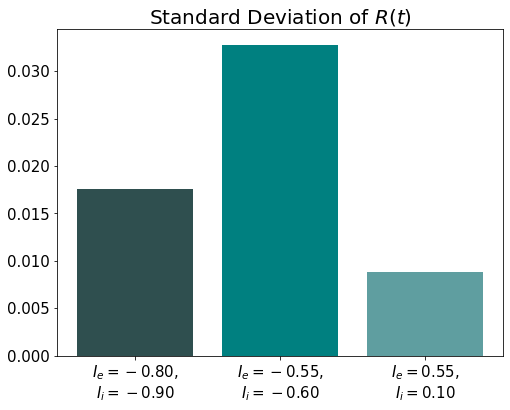

In [70]:
kstd, kastd, khstd = np.std(k, ddof=1),np.std(ka, ddof=1),np.std(kh, ddof=1)
plt.figure(figsize=(8,6)) 
plt.bar([r'$I_e=%.2f$,'%ee + '\n' + r'$I_i=%.2f$' %ii, 
         r'$I_e=%.2f$,'%ee1 + '\n' + r'$I_i=%.2f$' %ii1, 
         r'$I_e=%.2f$,'%ee2 + '\n' + r'$I_i=%.2f$' %ii2], [kstd, kastd, khstd], color=['darkslategray', 'teal', 'cadetblue'])
plt.title(r'Standard Deviation of $R(t)$', fontsize=tfs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1585050324.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1585050324.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


Text(0, 0.5, 'h-current\nx $[ \\mu m]$')

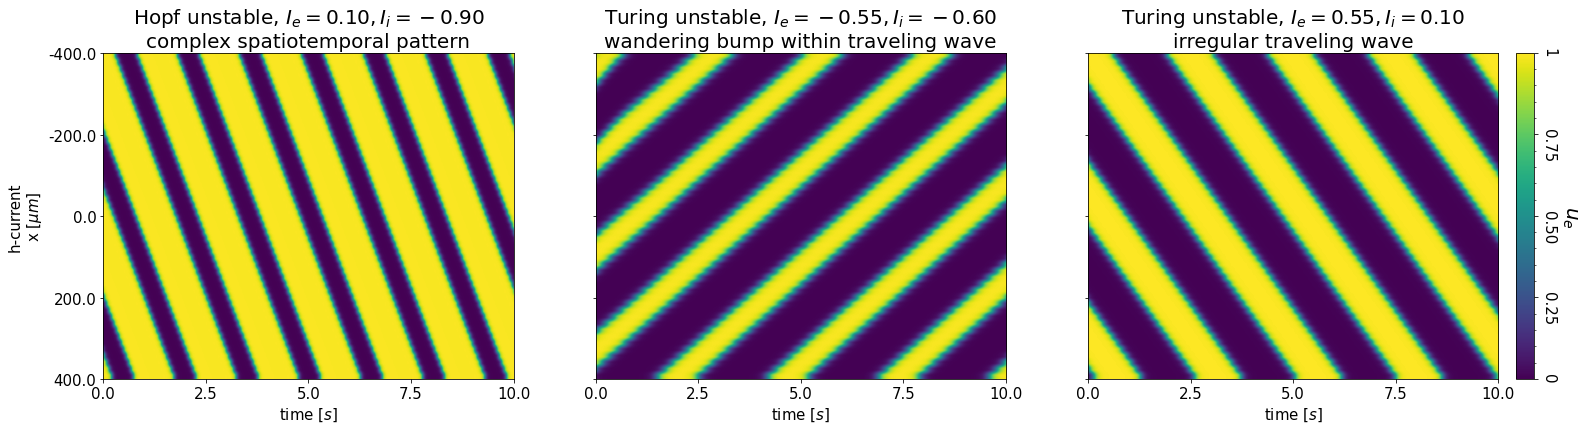

In [123]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 10
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

titles = [r'Hopf unstable, $I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'complex spatiotemporal pattern', 
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(ee1,ii1) + '\n' + 'wandering bump within traveling wave',
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(ee2,ii2) + '\n' + 'irregular traveling wave']

ax0.imshow(ue.T[50:100,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[50:100,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[50:100,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')


cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([.91,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('h-current' + '\n' + 'x ' + r'$[ \mu m]$', fontsize=fs)

In [112]:
ee = 0.1
ii = -0.9
params={'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 30*1000, 'dt': 0.9, 'beta_a': 5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

params_adaps = {'I_e': -0.35, 'I_i': -1.0, 'b': 0.2, 'end_t': 30*1000, 'dt': 0.5, 'beta_a': 5, 
                'length': 800, 'n': 1600,
                'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

params_h = {'I_e': 0.1, 'I_i': -0.4, 'b': 0.2, 'end_t': 60*1000, 'dt': 0.5, 'beta_a': 5,
                'length': 800, 'n': 1600,
                'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [113]:
#compute fp-values of uncoupled system.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

wavenumber = vio[1]

#compute fp-values of uncoupled system.
fps_adaps, stab_adaps = run_fixedpoints(params_adaps)
vio_adaps = run_violation(params_adaps, fps_adaps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_adaps), str(stab_adaps)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_adaps[0]), str(vio_adaps)))

wavenumber_adaps = vio_adaps[0][1]

#compute fp-values of uncoupled system.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fps_h[0]), str(vio_h)))

wavenumber_h = vio_h[0][1]

without mechanism: fixed points [[0.43673841 0.55357154]], stability [0] (1=stable, 0=unstable)
the down-fp [0.43673841 0.55357154] undergoes the violations ((1, 0.504), (1, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.33043447 0.29455868]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.33043447 0.29455868] undergoes the violations ((1, 0.482), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.18479892 0.36051434]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.18479892 0.36051434] undergoes the violations ((1, 0.582), (1, 0), (0, 0)) (0=no vio, 1=turing)


In [114]:
#without mechanism
ue, ui = run(params, fp=fps[0], wavenumber=vio[0][1], itype='rungekutta')

In [115]:
#with adaptation
ue_adaps, ui_adaps = run(params_adaps, fp=fps_adaps[0], wavenumber=vio_adaps[0][1], itype='rungekutta')

In [116]:
#with h-current
ue_h, ui_h = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1], itype='rungekutta')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1810406977.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1810406977.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


Text(0, 0.5, 'x $[ \\mu m]$')

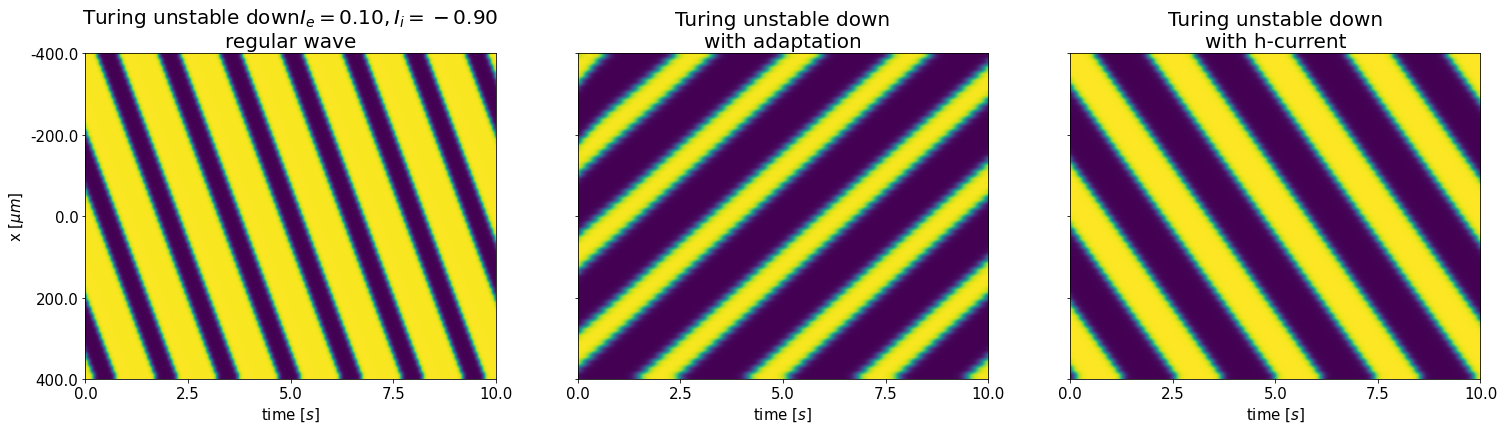

In [157]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)

#visualize randomly initialized next to init in fp
fix, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 10

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

titles = ['Turing unstable down'+ r'$I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'regular wave', 
          'Turing unstable down' + '\n' + 'with adaptation',
          'Turing unstable down' + '\n' + 'with h-current']

ax0.imshow(ue.T[50:100,-int(duration*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[50:100,-int(duration*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')
ax2.imshow(ue_h.T[50:100,-int(duration*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1791928235.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0,5,5), fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/1791928235.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,1,5), fontsize=fs)


Text(0, 0.5, '$u_e$')

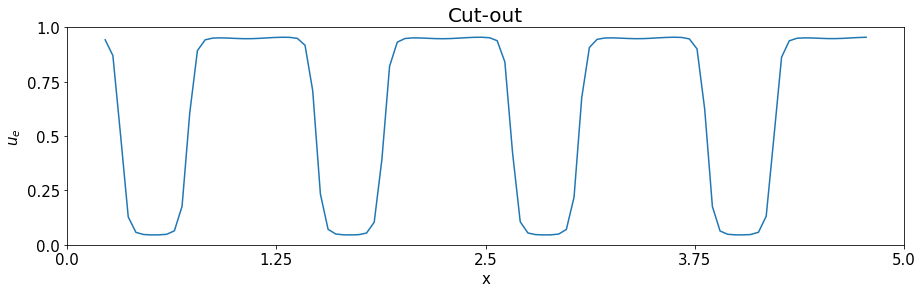

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(ue.T[:100,int(5*1000*2)])
ax.set_title('Cut-out', fontsize=tfs)

ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_xticklabels(np.linspace(0,5,5), fontsize=fs)

ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_yticklabels(np.linspace(0,1,5), fontsize=fs)

ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel(r'$u_e$', fontsize=fs)

In [159]:
fr, psd_fr = getAvgPSD(ue[:,-int(20*1000*2):], fs=params['n'], nperseg=1)
fr

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3293/3087130257.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)


64.0

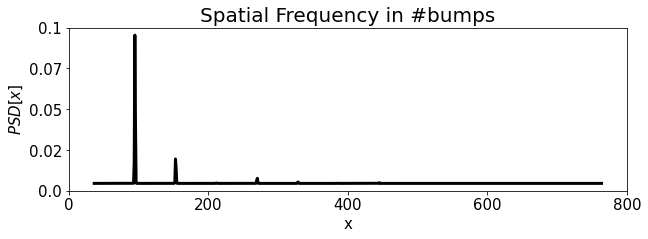

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(fr, psd_fr, c='k', lw=3)
ax.set_title('Spatial Frequency in #bumps', fontsize=tfs)

ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_xticklabels(np.linspace(0,len(fr),5).astype(int), fontsize=fs)

ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_yticklabels(np.linspace(0,max(psd_fr),5).round(decimals=2), fontsize=fs)

ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel(r'$PSD[x]$', fontsize=fs)
fr[np.argmax(psd_fr)]

In [67]:
params=setParams(params)
duration = 20 #5
trial_default = ue.T[:,-duration*int(1000*(1/params.dt)):]#.shape
trial_adaps = ue_adaps.T[:,-duration*int(1000*(1/params.dt)):]#.shape
trial_h = ue_h.T[:,-duration*int(1000*(1/params.dt)):]#.shape
trial_h.shape

(1600, 22220)

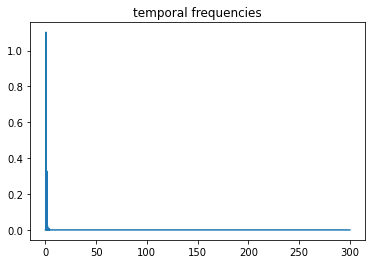

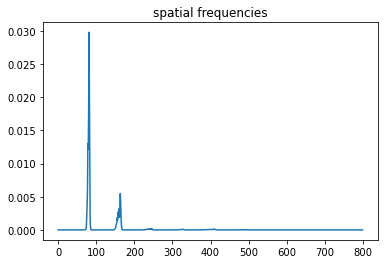

In [68]:
from explo import collectPatterns

params = setParams(params)
params_adaps = setParams(params_adaps)
params_h = setParams(params_h)

p1 = collectPatterns(fps[0], params, maxfreq=300, nperseg=duration, ue=trial_default)#fp, params, maxfreq=300, nperseg=1, ue=None
#p2 = collectPatterns(fps_adaps[0], params_adaps,  maxfreq=300, nperseg=duration, ue=trial_adaps)
#p3 = collectPatterns(fps_h[0], params_h,  maxfreq=300, nperseg=duration, ue=trial_h)

In [69]:
p1, p2, p3

((4, 0.7000000000000001, 0.019437924374798837, 81.0, 0.0016201468456133713),
 (4, 0.30000000000000004, 0.035510439344730985, 71.0, 0.003358748319632796),
 (4, 0.25, 0.034977261817382116, 103.0, 0.002944070279426798))

In [56]:
p1, p2, p3

((4, 0.2, 0.021892456359105604, 74.0, 0.0008169014167946748),
 (4, 0.30000000000000004, 0.035510439344730985, 71.0, 0.003358748319632796),
 (4, 0.25, 0.034977261817382116, 103.0, 0.002944070279426798))

In [58]:
lmbda = 2*np.pi / vio[0][1]
lmbda

12.770701843860948

In [59]:
params.length/lmbda

62.64338560097001